RMSE                                                        \
           count       mean        std       min        25%        50%   
Model_Name                                                               
GRU Model   61.0  27.124252  25.700984  7.736240  17.481597  23.921770   
LSTM Model  61.0  29.635583  26.677067  8.058761  18.662309  25.948651   
TGCN Model  61.0  19.428297  13.861553  3.699905  12.056827  17.260852   

                                  SMAPE             ...                       \
                  75%         max count       mean  ...       75%        max   
Model_Name                                          ...                        
GRU Model   27.976197  179.582316  61.0  10.187275  ...  8.660668  55.367613   
LSTM Model  33.248552  182.069530  61.0  10.246413  ...  8.989010  55.717170   
TGCN Model  20.466799   75.218266  61.0   8.050166  ...  7.617167  30.847304   

           MAAPE                                                              \
           count      mean       std       min       25%       50%       75%   
Model_Name                                                                     
GRU Model   61.0  9.808970  8.481963  4.282893  6.188776  6.913872  8.554414   
LSTM Model  61.0  9.976122  8.340686  4.102966  6.321905  7.185118  9.318904   
TGCN Model  61.0  7.612436  5.942364  3.187425  4.381172  5.132958  7.489606   

                       
                  max  
Model_Name             
GRU Model   60.435355  
LSTM Model  60.927449  
TGCN Model  30.679546  

[3 rows x 24 columns]

MAAPE                                                    
             count      mean       std    min   25%   50%   75%    max
Diff                                                                  
GRU vs LSTM   61.0 -0.167049  1.227440  -2.73 -0.80 -0.23  0.19   5.81
GRU vs TGCN   61.0  2.196393  4.805382 -11.66  0.41  2.04  3.39  29.76
LSTM vs GRU   61.0  0.167049  1.227440  -5.81 -0.19  0.23  0.80   2.73
LSTM vs TGCN  61.0  2.363770  4.883130 -10.89  0.68  2.01  3.67  30.25
TGCN vs GRU   61.0 -2.196393  4.805382 -29.76 -3.39 -2.04 -0.41  11.66
TGCN vs LSTM  61.0 -2.363770  4.883130 -30.25 -3.67 -2.01 -0.68  10.89

,Good results TGCN Model
count,48.000000
mean,6.616514
std,5.424349
min,3.187425
25%,4.168508
50%,4.760263
75%,5.921790
max,30.679546


,Bad results TGCN Model
count,13.000000
mean,11.289690
std,6.534497
min,6.100454
25%,6.406097
50%,8.575900
75%,15.098908
max,24.317114


,Good results LSTM Model
count,7.000000
mean,10.963993
std,7.640958
min,5.221502
25%,6.226146
50%,6.449018
75%,14.999432
max,22.626276


,Bad results LSTM Model
count,54.000000
mean,9.848065
std,8.485281
min,4.102966
25%,6.340218
50%,7.208794
75%,9.215935
max,60.927449


,Good results GRU Model
count,6.000000
mean,6.188080
std,0.624180
min,5.558325
25%,5.688982
50%,6.104603
75%,6.501573
max,7.176611


,Bad results GRU Model
count,55.000000
mean,10.203976
std,8.847920
min,4.282893
25%,6.354089
50%,6.971424
75%,8.990066
max,60.435355


([<matplotlib.axis.YTick at 0x1fbb93220e0>,
 [Text(0, 0.0, '0'),
  Text(0, 4.0, '4'),
  Text(0, 8.0, '8'),
  Text(0, 12.0, '12'),
  Text(0, 16.0, '16'),
  Text(0, 20.0, '20'),
  Text(0, 24.0, '24'),
  Text(0, 28.0, '28'),
  Text(0, 32.0, '32'),
  Text(0, 36.0, '36'),
  Text(0, 40.0, '40'),
  Text(0, 44.0, '44'),
  Text(0, 48.0, '48'),
  Text(0, 52.0, '52'),
  Text(0, 56.0, '56'),
  Text(0, 60.0, '60')])

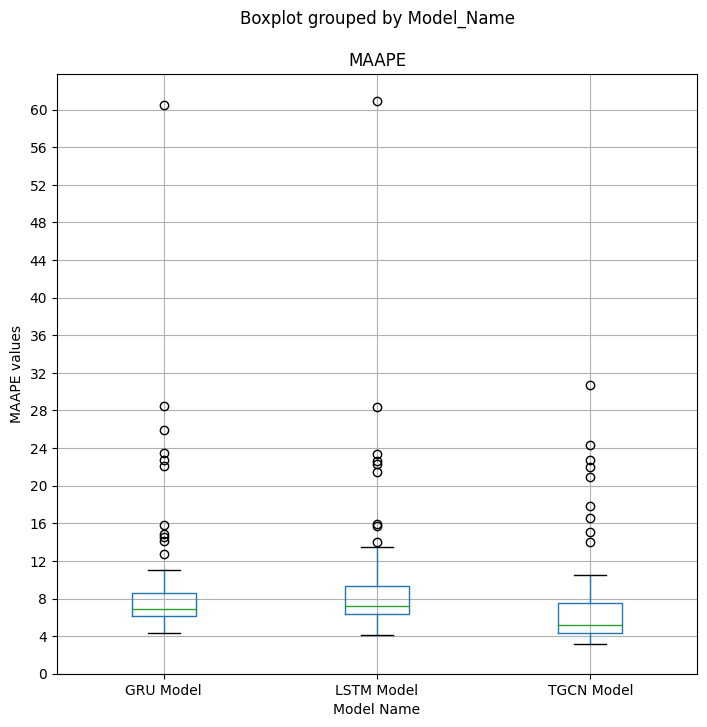

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
normalization = "center_and_reduce"
n_neighbors = 60
_window_size = 7
horizon = 1
path_save_model = f"./{normalization}/nb_captor_{n_neighbors+1}/windows_{_window_size}_out_{horizon}"

model_names = ["TGCN Model", "LSTM Model", "GRU Model"]
diff_resultats = []

# Get save dataframes
final_results = pd.read_pickle(f"{path_save_model}/final_resultats.pkl")

# Initialisation dict good and bad results
good_results = {model_name: [] for model_name in model_names}
bad_results = {model_name: [] for model_name in model_names}

# Compute results
for i in final_results.index.get_level_values("Captor").unique():
    diff_resultats.extend(
        (
            [
                "TGCN vs LSTM",
                round(
                    final_results.loc[i].loc["TGCN Model"]["MAAPE"]
                    - final_results.loc[i].loc["LSTM Model"]["MAAPE"],
                    2,
                ),
            ],
            [
                "TGCN vs GRU",
                round(
                    final_results.loc[i].loc["TGCN Model"]["MAAPE"]
                    - final_results.loc[i].loc["GRU Model"]["MAAPE"],
                    2,
                ),
            ],
            [
                "LSTM vs TGCN",
                round(
                    final_results.loc[i].loc["LSTM Model"]["MAAPE"]
                    - final_results.loc[i].loc["TGCN Model"]["MAAPE"],
                    2,
                ),
            ],
            [
                "LSTM vs GRU",
                round(
                    final_results.loc[i].loc["LSTM Model"]["MAAPE"]
                    - final_results.loc[i].loc["GRU Model"]["MAAPE"],
                    2,
                ),
            ],
            [
                "GRU vs TGCN",
                round(
                    final_results.loc[i].loc["GRU Model"]["MAAPE"]
                    - final_results.loc[i].loc["TGCN Model"]["MAAPE"],
                    2,
                ),
            ],
            [
                "GRU vs LSTM",
                round(
                    final_results.loc[i].loc["GRU Model"]["MAAPE"]
                    - final_results.loc[i].loc["LSTM Model"]["MAAPE"],
                    2,
                ),
            ],
        )
    )
    

stats = {model_name: {"nb_win": 0} for model_name in model_names}
for captor_id in final_results.index.get_level_values("Captor").unique():
    best_model_name = final_results.loc[captor_id]["MAAPE"].idxmin()
    best_model_result = final_results.loc[captor_id].loc[best_model_name]["MAAPE"]
    stats[best_model_name]["nb_win"] += 1
    good_results[best_model_name].append(best_model_result)
    for model_name in model_names:
        if model_name != best_model_name:
            bad_result = final_results.loc[captor_id].loc[model_name]["MAAPE"]
            bad_results[model_name].append(bad_result)


# print analyses
display(final_results.groupby("Model_Name")[["RMSE", "SMAPE", "MAAPE"]].describe())

diff_resultats = pd.DataFrame(diff_resultats, columns=["Diff", "MAAPE"])
diff_resultats.set_index(["Diff"], inplace=True)
display(diff_resultats.groupby("Diff").describe())


for model_name in model_names:
    good_df = pd.DataFrame(good_results[model_name], columns=[f"Good results {model_name}"])
    display(good_df.describe())
    bad_df = pd.DataFrame(bad_results[model_name], columns=[f"Bad results {model_name}"])
    display(bad_df.describe())

# Print bar plots
bar_plot_results = final_results.reset_index()
bar_plot_results.boxplot(column="MAAPE", by="Model_Name", fontsize=10, figsize=(8,8), ylabel="MAAPE values", xlabel="Model Name")
plt.yticks(np.arange(0, bar_plot_results["MAAPE"].max(), 4))
